In [ ]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df=pd.read_csv("/content/insulin_prediction.csv")

In [ ]:
df.shape

(768, 17)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target_glucose,Insulin_prescribed,avg_heart_beat,gender,covid_positive,Previous_generation_diabetes,sleep,Workout,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,93,1.10,83,0,0,1,4,2267,1
1,1,85,66.0,29,0,26.6,0.351,31,0,0.00,81,0,1,1,6,1540,0
2,8,183,64.0,0,0,23.3,0.672,32,118,1.30,86,0,1,0,6,1709,1
3,1,89,66.0,23,94,28.1,0.167,21,0,0.00,81,0,0,0,6,2046,0
4,0,137,40.0,35,168,43.1,2.288,33,95,0.84,69,1,0,0,5,1345,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pregnancies                   768 non-null    int64  
 1   Glucose                       768 non-null    int64  
 2   BloodPressure                 768 non-null    float64
 3   SkinThickness                 768 non-null    int64  
 4   Insulin                       768 non-null    int64  
 5   BMI                           768 non-null    float64
 6   DiabetesPedigreeFunction      768 non-null    float64
 7   Age                           768 non-null    int64  
 8   target_glucose                768 non-null    int64  
 9   Insulin_prescribed            768 non-null    float64
 10  avg_heart_beat                768 non-null    int64  
 11  gender                        768 non-null    int64  
 12  covid_positive                768 non-null    int64  
 13  Previ

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target_glucose,Insulin_prescribed,avg_heart_beat,gender,covid_positive,Previous_generation_diabetes,sleep,Workout,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.254807,20.536458,79.799479,31.992578,0.471876,33.240885,35.803385,0.314089,82.091146,0.144531,0.559896,0.528646,6.029948,1483.903646,0.348958
std,3.369578,31.972618,12.115932,15.952218,115.244002,7.884160,0.331329,11.760232,51.935389,0.517942,10.056011,0.351857,0.496723,0.499504,1.557382,531.962428,0.476951
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,4.000000,504.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,5.000000,1085.500000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000,82.000000,0.000000,1.000000,1.000000,6.000000,1421.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,96.250000,0.605000,90.000000,0.000000,1.000000,1.000000,7.000000,1931.250000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,130.000000,2.040000,100.000000,1.000000,1.000000,1.000000,9.000000,2499.000000,1.000000


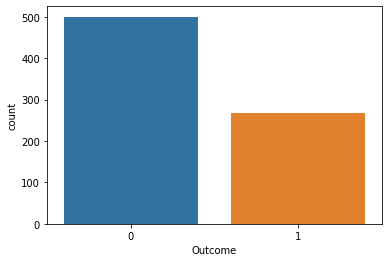

In [ ]:
sns.countplot(x = 'Outcome',data = df)

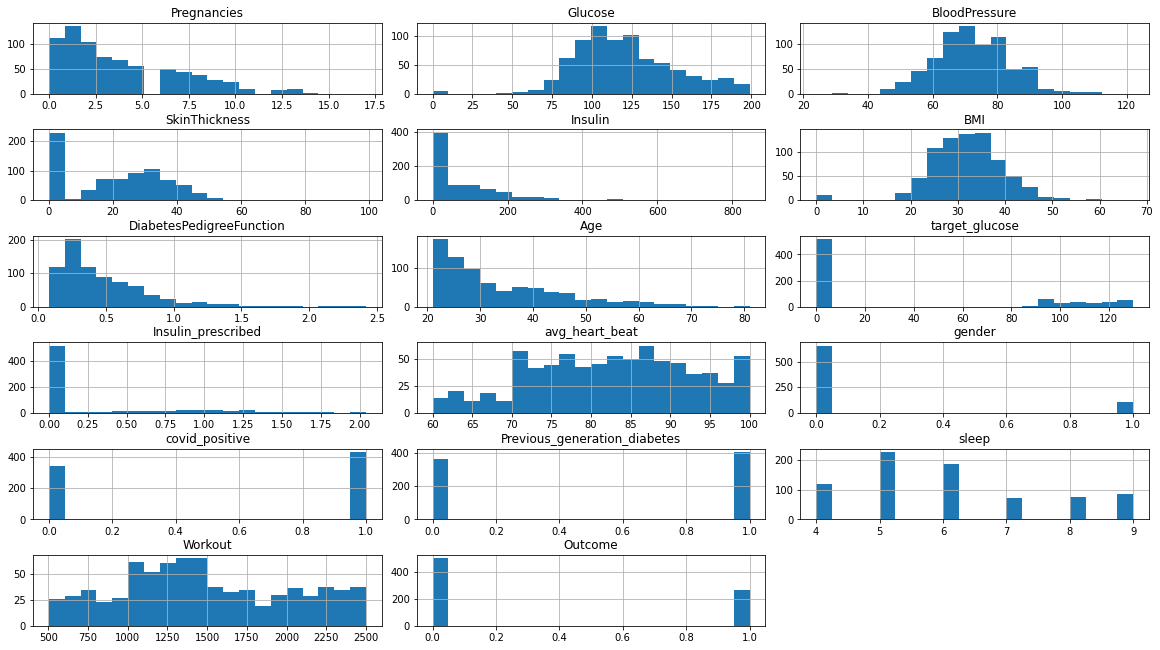

In [ ]:
# Histogram of each feature
import itertools

col = df.columns[:17]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

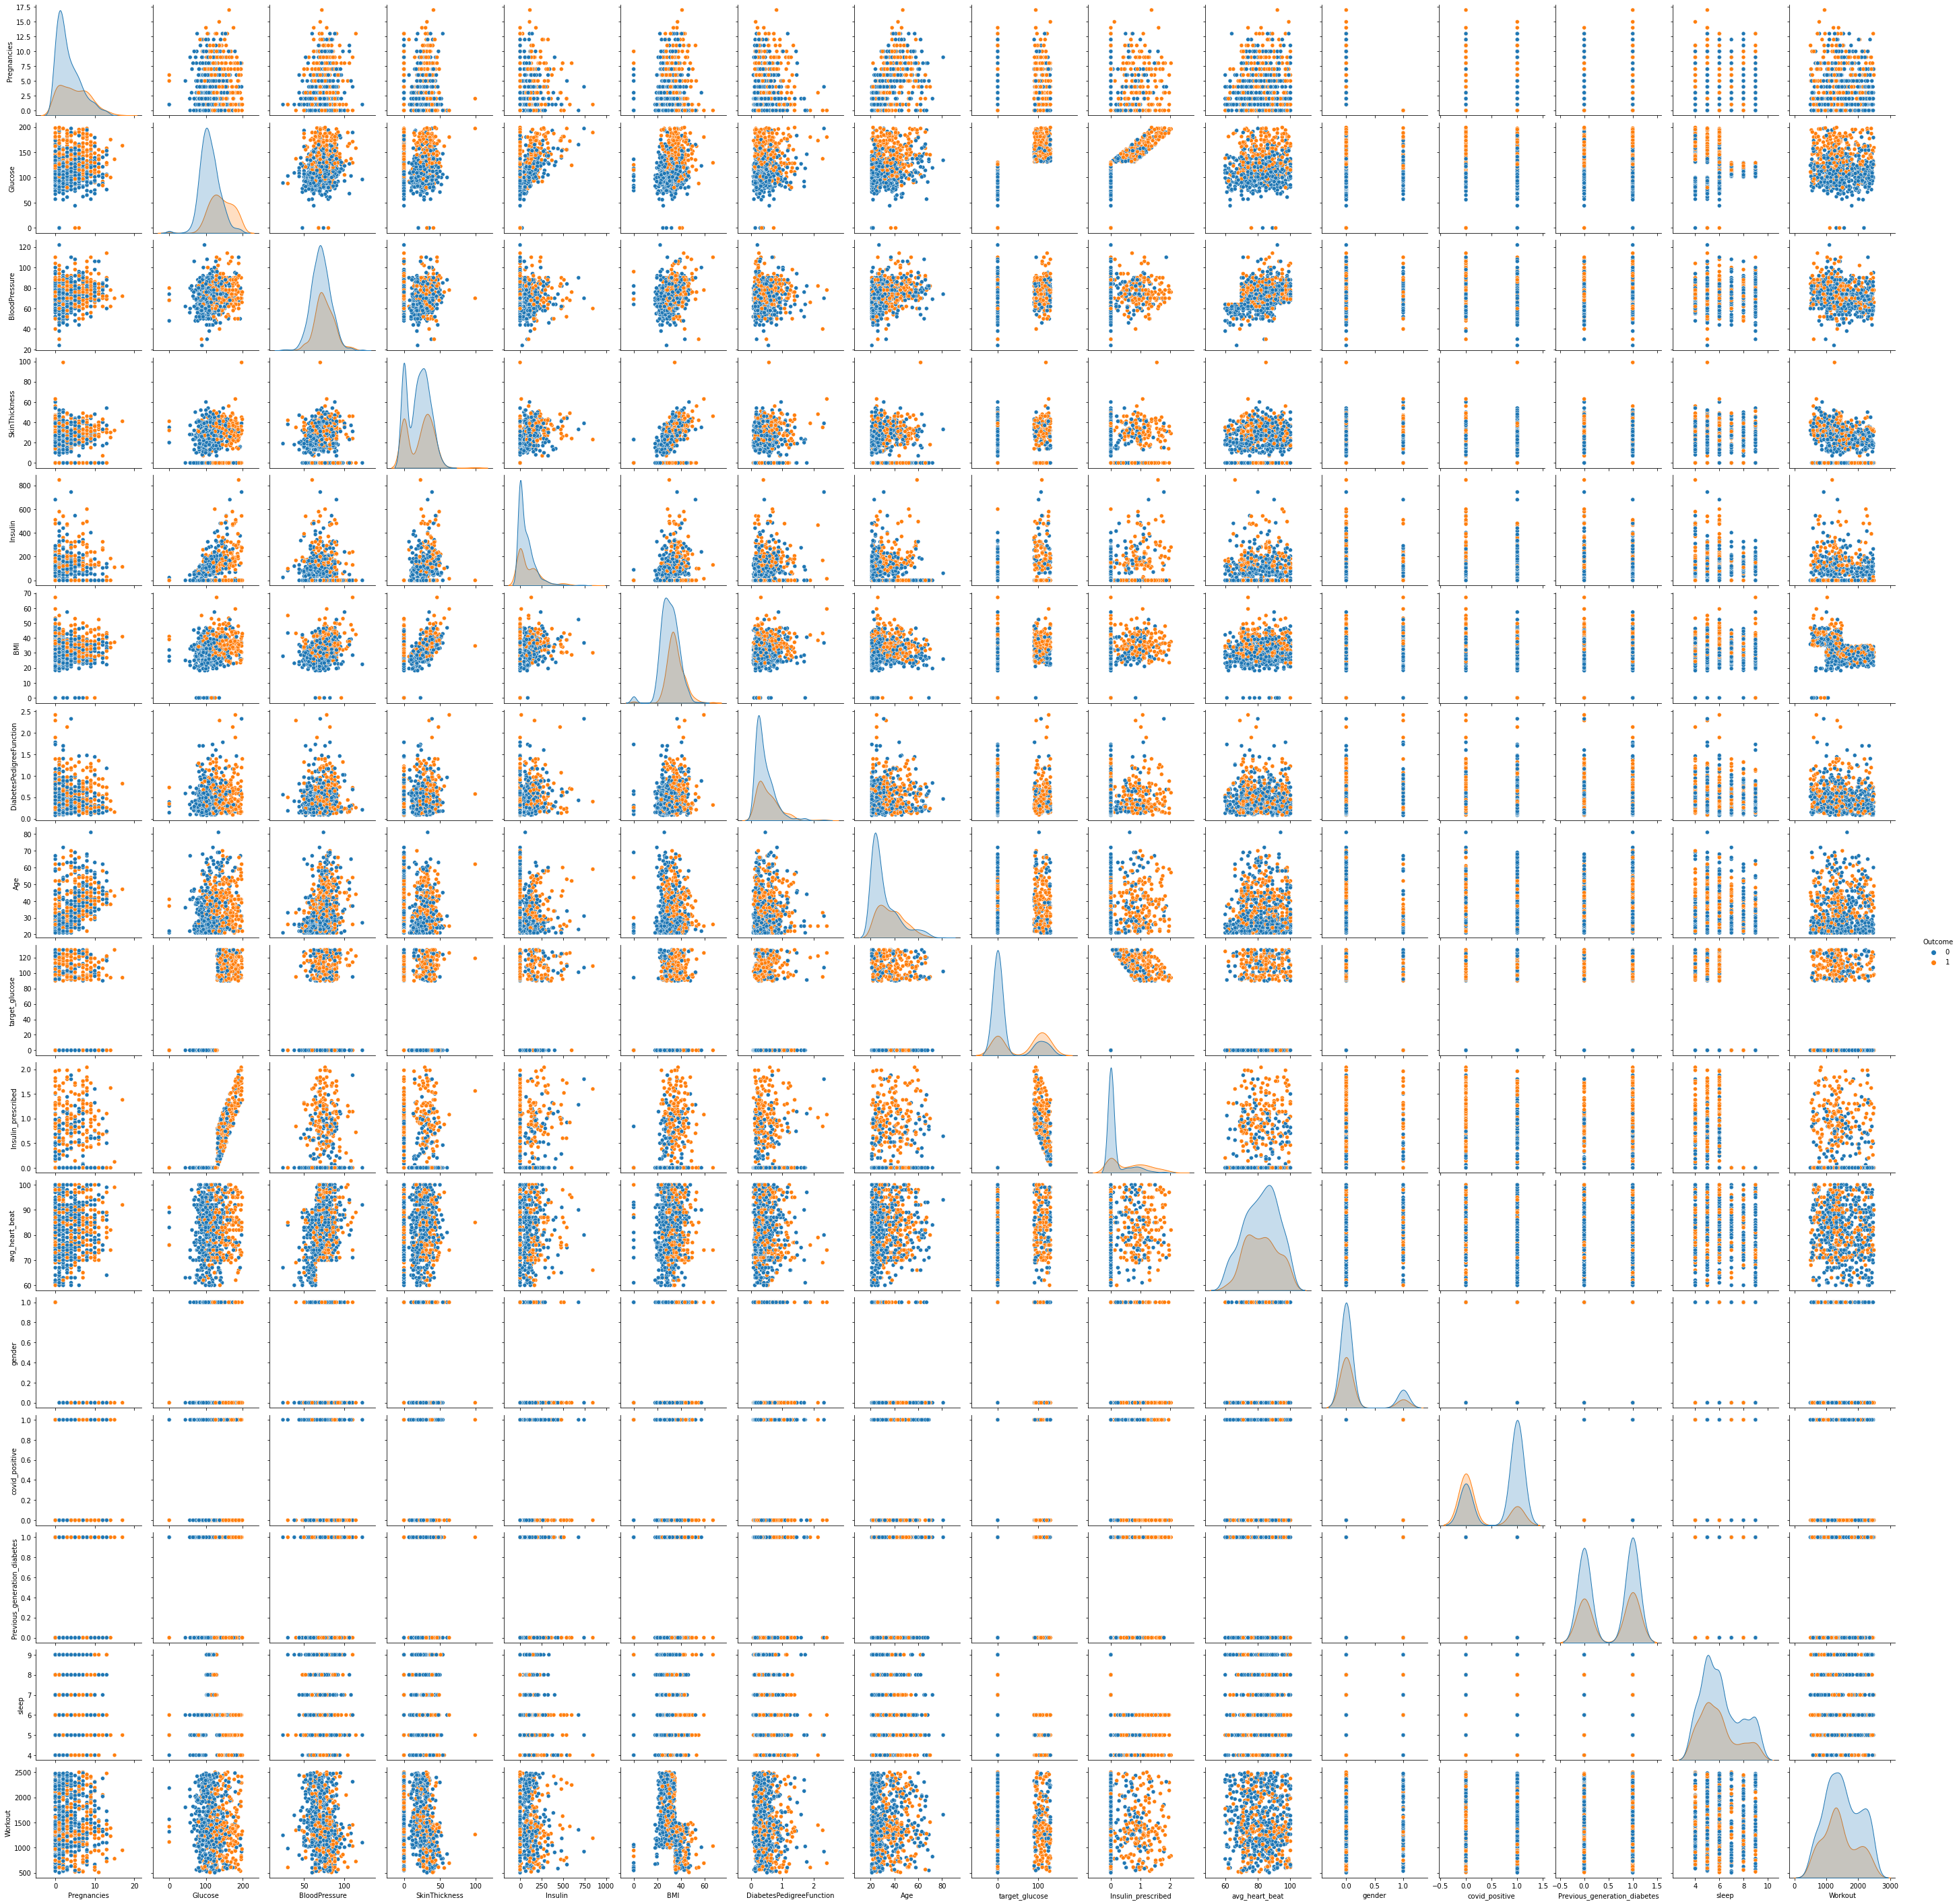

In [ ]:
sns.pairplot(df,hue="Outcome")

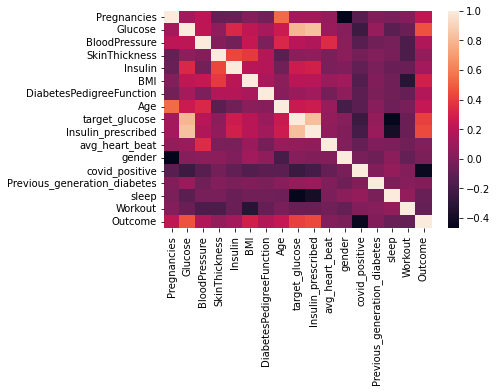

In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
df_new=df

In [ ]:
df_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",'target_glucose','Insulin_prescribed']] =df_new[["Glucose", 
                                                          "BloodPressure", "SkinThickness", "Insulin", "BMI",'target_glucose','Insulin_prescribed']] .replace(0, np.NaN)

In [ ]:
# Count of NaN
df_new.isnull().sum()


Pregnancies                       0
Glucose                           5
BloodPressure                     0
SkinThickness                   227
Insulin                         374
BMI                              11
DiabetesPedigreeFunction          0
Age                               0
target_glucose                  517
Insulin_prescribed              517
avg_heart_beat                    0
gender                            0
covid_positive                    0
Previous_generation_diabetes      0
sleep                             0
Workout                           0
Outcome                           0
dtype: int64

In [ ]:
# Replacing NaN with mean values
df_new["Glucose"].fillna(df_new["Glucose"].mean(), inplace = True)
df_new["BloodPressure"].fillna(df_new["BloodPressure"].mean(), inplace = True)
df_new["SkinThickness"].fillna(df_new["SkinThickness"].mean(), inplace = True)
df_new["Insulin"].fillna(df_new["Insulin"].mean(), inplace = True)
df_new["BMI"].fillna(df_new["BMI"].mean(), inplace = True)
df_new["target_glucose"].fillna(df_new["target_glucose"].mean(), inplace = True)
df_new["Insulin_prescribed"].fillna(df_new["Insulin_prescribed"].mean(), inplace = True)

In [ ]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target_glucose,Insulin_prescribed,avg_heart_beat,gender,covid_positive,Previous_generation_diabetes,sleep,Workout,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.254807,29.153420,155.548223,32.457464,0.471876,33.240885,109.549801,0.961036,82.091146,0.144531,0.559896,0.528646,6.029948,1483.903646,0.348958
std,3.369578,30.435949,12.115932,8.790942,85.021108,6.875151,0.331329,11.760232,7.312375,0.254559,10.056011,0.351857,0.496723,0.499504,1.557382,531.962428,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,90.000000,0.060000,60.000000,0.000000,0.000000,0.000000,4.000000,504.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,109.549801,0.961036,74.000000,0.000000,0.000000,0.000000,5.000000,1085.500000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.400000,0.372500,29.000000,109.549801,0.961036,82.000000,0.000000,1.000000,1.000000,6.000000,1421.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,109.549801,0.961036,90.000000,0.000000,1.000000,1.000000,7.000000,1931.250000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,130.000000,2.040000,100.000000,1.000000,1.000000,1.000000,9.000000,2499.000000,1.000000


In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_scaled = sc.fit_transform(df_new)

In [ ]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,0.075000,0.525253,0.575,0.0,0.0,1.0,0.0,0.883709,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.488745,0.455069,0.525,0.0,1.0,1.0,0.4,0.519298,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,0.700000,0.626263,0.650,0.0,1.0,0.0,0.4,0.604010,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.488745,0.455069,0.525,0.0,0.0,0.0,0.4,0.772932,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0.125000,0.393939,0.225,1.0,0.0,0.0,0.2,0.421554,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.488745,0.455069,0.625,0.0,1.0,1.0,0.4,0.408521,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.488745,0.455069,0.550,0.0,0.0,1.0,0.6,0.115789,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.488745,0.455069,0.550,0.0,1.0,1.0,1.0,0.898246,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,0.488745,0.455069,0.725,0.0,1.0,1.0,0.6,0.784962,1.0


In [ ]:
X=df_scaled.iloc[:,[0,1,2,3,4,5,6,7,10,11,12,13,14,15]]
Y=df_scaled.iloc[:,16].values

In [ ]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df_new['Outcome'] )

In [ ]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 14)
X_test shape: (154, 14)
Y_train shape: (614,)
Y_test shape: (154,)


#KNN

<ipython-input-24-43889229662c>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acc = pd.Series()


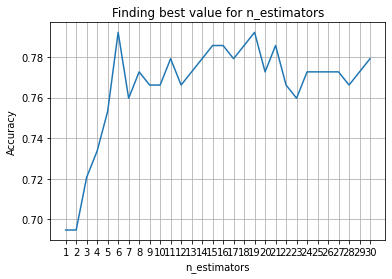

Highest value:  0.7922077922077922


In [ ]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
Y_pred_knn = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print("K Nearest neighbors: " + str(accuracy_knn * 100))

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred_knn)  
print(cm)

from sklearn.metrics import f1_score

K Nearest neighbors: 79.22077922077922
[[89 11]
 [21 33]]


#SVM

In [ ]:
X=df_scaled.iloc[:,[0,1,2,3,4,5,6,7,10,11,12,13,14,15]]
Y=df_scaled.iloc[:,16].values

# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,random_state = 42, stratify = df_new['Outcome'] )

In [ ]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 2529)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=2529)

In [ ]:
Y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

cm= confusion_matrix(Y_test, Y_pred_svc)  
cm

Support Vector Classifier: 81.81818181818183


array([[84, 16],
       [12, 42]])

#Decision tree

In [ ]:
X=df_scaled.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15]]
Y=df_scaled.iloc[:,16].values

In [ ]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df_new['Outcome'] )
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)



DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
Y_pred_dectree = dectree.predict(X_test)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
print("Decision tree: " + str(accuracy_dectree * 100))

cm= confusion_matrix(Y_test, Y_pred_dectree)  
cm

Decision tree: 76.62337662337663


array([[81, 19],
       [17, 37]])

#RANDOM FOREST

In [ ]:
# Random forest Algorithm
X=df_scaled.iloc[:,[0,1,2,3,4,5,6,7,14,15]]
y=df_scaled.iloc[:,16].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state =42)
rfc.fit(X_train, y_train)
y_pred_ranfor=rfc.predict(X_test)
accuracy_rfc=rfc.score(X_test, y_test)*100
print("Random Forest : " + str(accuracy_rfc))
cm= confusion_matrix(y_test, y_pred_ranfor)  
cm

Random Forest : 84.4155844155844


array([[96, 11],
       [13, 34]])